In [22]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.plotly as py
import plotly.graph_objs as go

import colorlover as cl
from IPython.display import HTML

In [2]:
#Import SPON Articles
SPON_PATH =''
df = pd.read_csv(SPON_PATH,sep=';')
df['Key'] = df.index
df['Key'] = 'SPON-' + df.index.astype(str)

In [3]:
# Transpose Dataframe: Each Keyword per Row
df = (df['Keywording'].str.split(',', expand=True).stack().reset_index(level=0).set_index('level_0').rename(columns={0:'Keywording'}).join(df.drop('Keywording',1), how='left'))
#Add Counter
df['Counter'] = 1
#Data-Cleaning: Strip spaces from Keywords
df['Keywording'] = df['Keywording'].str.strip(' ')
#Drop duplicate rows in the dataframe
df = df.drop_duplicates()
#Check Dataframe
df.head(5)

,Keywording,Dates,Links,Newspaper,Summary,Titles,Fulltexts,Author,Top_image_link,Movie_link,Sources,Key,Counter
0,Politik,"Thu, 23 Feb 2017 16:28:39 +0100",http://www.spiegel.de/politik/ausland/geert-wi...,http://www.spiegel.de/politik/index.rss,Ein Personenschützer des niederländischen Rech...,Sicherheitsbedenken: Geert Wilders sagt alle W...,Aus Angst um seine Sicherheit verzichtet der n...,[' '],http://cdn2.spiegel.de/images/image-1110961-ga...,[],asa/Reuters/AP,SPON-0,1
0,Ausland,"Thu, 23 Feb 2017 16:28:39 +0100",http://www.spiegel.de/politik/ausland/geert-wi...,http://www.spiegel.de/politik/index.rss,Ein Personenschützer des niederländischen Rech...,Sicherheitsbedenken: Geert Wilders sagt alle W...,Aus Angst um seine Sicherheit verzichtet der n...,[' '],http://cdn2.spiegel.de/images/image-1110961-ga...,[],asa/Reuters/AP,SPON-0,1
0,Geert Wilders,"Thu, 23 Feb 2017 16:28:39 +0100",http://www.spiegel.de/politik/ausland/geert-wi...,http://www.spiegel.de/politik/index.rss,Ein Personenschützer des niederländischen Rech...,Sicherheitsbedenken: Geert Wilders sagt alle W...,Aus Angst um seine Sicherheit verzichtet der n...,[' '],http://cdn2.spiegel.de/images/image-1110961-ga...,[],asa/Reuters/AP,SPON-0,1
0,Niederlande,"Thu, 23 Feb 2017 16:28:39 +0100",http://www.spiegel.de/politik/ausland/geert-wi...,http://www.spiegel.de/politik/index.rss,Ein Personenschützer des niederländischen Rech...,Sicherheitsbedenken: Geert Wilders sagt alle W...,Aus Angst um seine Sicherheit verzichtet der n...,[' '],http://cdn2.spiegel.de/images/image-1110961-ga...,[],asa/Reuters/AP,SPON-0,1
1,Politik,"Thu, 23 Feb 2017 15:32:00 +0100",http://www.spiegel.de/politik/deutschland/thom...,http://www.spiegel.de/politik/index.rss,Die Deutschen bekommen neue Reisepässe. Die Do...,Innenminister de Maizière: Das ist der neue Re...,Bundesinnenminister Thomas de Maizière hat ein...,[' '],http://cdn1.spiegel.de/images/image-1110900-ga...,[],asa/dpa,SPON-1,1


# 1. Keyword-Analysis

In [5]:
#
fig = {
    'data': [{'labels': ['Deutschland', 'Ausland'],
              'values': [(df['Keywording'] == 'Deutschland').sum(), (df['Keywording'] == 'Ausland').sum()],
              'type': 'pie'
             }],
    'layout': {'title': 'How many Political Articles on SPON cover foreign affairs / home affairs'}
     }

py.iplot(fig)

#### Calculate for ten most frequent keywords (excluding: Politik, Deutschland, Ausland) 

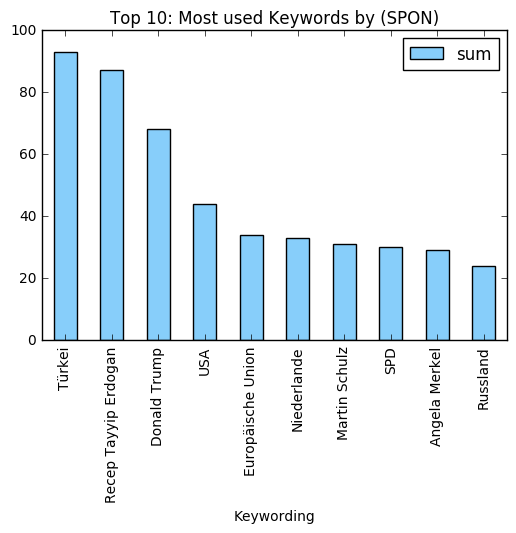

In [6]:
#Exclude The Politik, Deutschland, Ausland as Keyword
Keywords = df[(df.Keywording != 'Politik') & (df.Keywording != 'Deutschland') & (df.Keywording != 'Ausland')]

#Get Ten most frequent keywords
Keywords = Keywords.groupby(['Keywording']).Counter.agg(['sum']).sort_values(by='sum', ascending=False).head(10).plot(color='lightskyblue', kind='bar', title='Top 10: Most used Keywords by (SPON)' )
plt.show()

#### How many keywords on average per article

In [26]:
#Sum of all SPON Articles scraped sofar
Articles = len(df.Key.unique())
Articles

Keyword_Average = pd.pivot_table(df,index=['Key'],values='Keywording', aggfunc=lambda x: len(x.unique()))
#The Keyword 'Politik' is found in each article, thus it is taken out of the equasion by subtracting 1 
Keyword_Average = (Keyword_Average.sum() / Articles) - 1

Keyword_Average 

4.5486542443064186

# 2. Who are the most frequent mentioned politicians

In [29]:
PARL_PATH
Parliamentarians = pd.read_csv(PARL_PATH,sep=';')
df_unique = df.drop_duplicates('Fulltexts')

In [87]:
#Check How often Politician is mentioned in Text by Fullname
def Parl_check(Parl):
    count = 0
    for text in df_unique.Fulltexts:
        if Parl in text:
            count = count + 1
    return(count)

#Check which politicians is associated with specific keywords
def keyword_check(text,keywords):
    count = 0
    for Parl in Parliamentarians.fullname:
        if Parl in text:
            return(Parl)

In [88]:

Parliamentarians['Mentions'] = Parliamentarians.fullname.apply(Parl_check)

df['Politiker'] = df.apply(lambda x: keyword_check(x['Fulltexts'],x['Keywording']), axis=1)

In [90]:
Politicians = list(df.groupby(['Politiker'])['Keywording'])

AttributeError: 'list' object has no attribute 'value_count'

In [32]:
Parliamentarians.sort_values('Mentions',ascending=False).head(5)

,nachname,vorname,partei,website,feed,fullname,wikidataq,wikidataurl,wikidataname,distance,wikidatawebsite,distance.1,Mentions
353,Merkel,Angela,CDU,https://www.angela-merkel.de,NaN,Angela Merkel,Q567,https://www.wikidata.org/wiki/Q567,Angela Merkel,0,https://www.angela-merkel.de/,0,86
126,Gabriel,Sigmar,SPD,https://sigmar-gabriel.de,1.0,Sigmar Gabriel,Q160902,https://www.wikidata.org/wiki/Q160902,Sigmar Gabriel,0,https://sigmar-gabriel.de,0,48
397,Özdemir,Cem,GRÜNE,http://www.oezdemir.de,1.0,Cem Özdemir,Q12839,https://www.wikidata.org/wiki/Q12839,Cem Özdemir,0,http://www.oezdemir.de/,0,13
573,von der Leyen,Ursula,CDU,http://www.ursula-von-der-leyen.de,NaN,Ursula von der Leyen,Q60772,https://www.wikidata.org/wiki/Q60772,Ursula von der Leyen,0,http://www.ursula-von-der-leyen.de/,0,11
391,Oppermann,Thomas,SPD,http://www.thomasoppermann.de,1.0,Thomas Oppermann,Q90833,https://www.wikidata.org/wiki/Q90833,Thomas Oppermann,0,http://www.thomasoppermann.de/,0,9


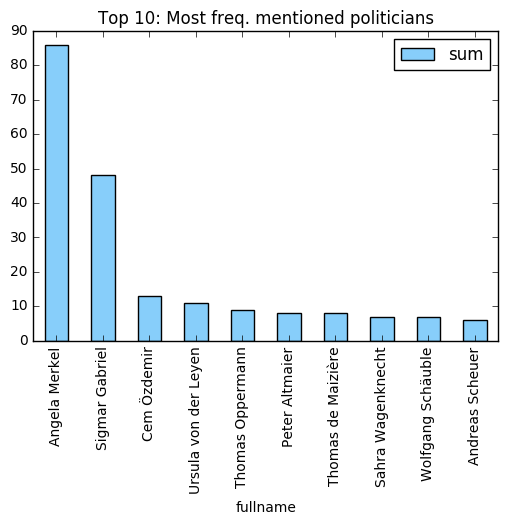

In [33]:
#Get Ten most frequent mentions of parliamentarians
Parliamentarians.groupby(['fullname']).Mentions.agg(['sum']).sort_values(by='sum', ascending=False).head(10).plot(color='lightskyblue', kind='bar', title='Top 10: Most freq. mentioned politicians' )
plt.show()

In [34]:
#Party Mentions in Media: Not yet checking for alternatives such as Grünen, ...Der Linken etc.
Parties = pd.pivot_table(Parliamentarians,index=['partei'])
del Parties['Mentions'],Parties['distance'],Parties['distance.1'],Parties['feed']
Parties['Name'] = Parties.index
Parties['Partymentions'] =  Parties.Name.apply(Parl_check)
Parties.sort_values(by='Partymentions',ascending=False)

,Name,Partymentions
partei,,
SPD,SPD,110
CDU,CDU,80
CSU,CSU,40
GRÜNE,GRÜNE,1
DIE LINKE,DIE LINKE,0


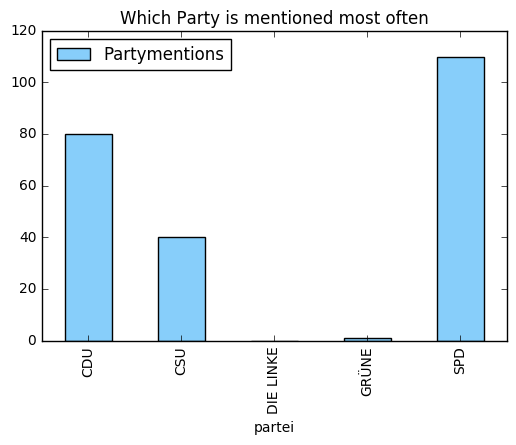

In [35]:
Parties.plot(color='lightskyblue', kind='bar', title='Which Party is mentioned most often')
plt.show()

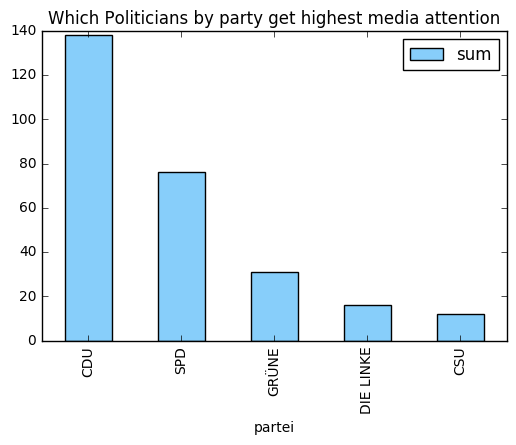

In [36]:
#Which Parties get most mentions due to the their Members?
Parliamentarians.groupby(['partei']).Mentions.agg(['sum']).sort_values(by='sum', ascending=False).head(10).plot(color='lightskyblue', kind='bar', title='Which Politicians by party get highest media attention' )
plt.show()